In [12]:
# load libraries
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

%matplotlib inline  
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [19]:
#load data
data = loadmat('./data/ex3data1.mat')
X,y=data['X'],data['y']
weights = loadmat('data/ex3weights.mat')
theta1, theta2 = weights['Theta1'], weights['Theta2']
# seperate them into X and y
X = np.c_[X]
y = np.c_[y]
print('X ',np.shape(X))
print('y ',np.shape(y))

# weights data
weights = loadmat('data/ex3weights.mat')
theta1, theta2 = weights['Theta1'], weights['Theta2']
theta1 = np.c_[theta1]
theta2 = np.c_[theta2]
print('theta1 ',np.shape(theta1))
print('theta2 ',np.shape(theta2))

X  (5000, 400)
y  (5000, 1)
theta1  (25, 401)
theta2  (10, 26)


In [70]:
# forward propogation
def predict(theta1,theta2,X):
    # first layer
    X_ext=np.c_[np.ones(X.shape[0]),X]
    y1=sp.special.expit(X_ext.dot(theta1.T))
    # second layer
    y1_ext=np.c_[np.ones(y1.shape[0]),y1]
    y2=sp.special.expit(y1_ext.dot(theta2.T))
    # summarize result
    y3=np.argmax(y2,axis=1)+1
    return(y3)

In [71]:
y_pre=predict(theta1,theta2,X)
print(np.sum((y_pre==y.T).astype(int))/np.size(y)*100)

97.52


[10  5  2  4  9 10  9  6  1  8]
[[10  5  2  4  9 10  9  6  1  8]]


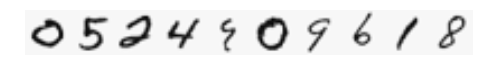

In [74]:
# show random sample
sample=np.random.choice(X.shape[0],10)
plt.imshow(X[sample].reshape(-1,20).T)
plt.axis('off');
print(y_pre[sample].T)
print(y[sample].T)